In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
Matches=pd.read_csv("matches.csv")

In [3]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [4]:
Matches.shape

(756, 18)

 # How many rows and columns are there?
 

In [5]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


# 756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [8]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions 

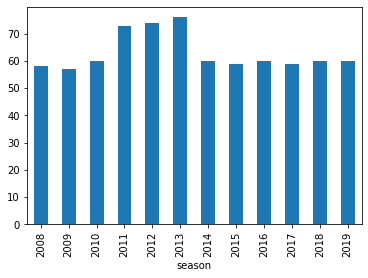

In [9]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [10]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [11]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.

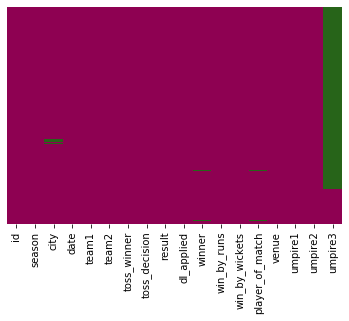

In [12]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

In [13]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


#  Removed the columns containing more missing values and have less impact on the predicting matches

In [14]:
Matches=Matches.drop(['umpire3','city'],axis=1)

In [15]:
Matches.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


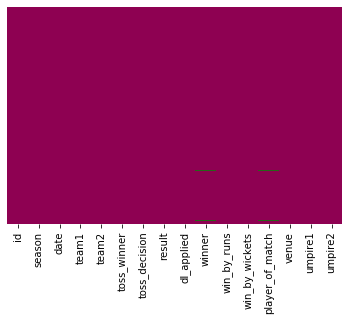

In [16]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

# Today's match is between MI and KKr.so we only want information between the matches that take place between them

In [17]:
MI_KKR1=Matches.loc[(Matches['team1']=='Mumbai Indians')&(Matches['team2'] =='Kolkata Knight Riders')]

In [18]:
MI_KKR1.head()

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
52,53,2017,2017-05-13,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,9,0,AT Rayudu,Eden Gardens,A Nand Kishore,S Ravi
131,132,2009,2009-04-27,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,92,0,SR Tendulkar,St George's Park,BG Jerling,RB Tiffin
137,138,2009,2009-05-01,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,JP Duminy,Buffalo Park,M Erasmus,SK Tarapore
229,230,2010,2010-04-19,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Kolkata Knight Riders,0,9,M Kartik,Eden Gardens,BG Jerling,RE Koertzen
362,363,2012,2012-05-12,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,27,0,RG Sharma,Eden Gardens,S Ravi,SJA Taufel


In [19]:
MI_KKR2=Matches.loc[(Matches['team2']=='Mumbai Indians')&(Matches['team1'] =='Kolkata Knight Riders')]

In [20]:
MI_KKR2

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
6,7,2017,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
57,58,2017,2017-05-19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,KV Sharma,M Chinnaswamy Stadium,NJ Llong,Nitin Menon
74,75,2008,2008-04-29,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,ST Jayasuriya,Eden Gardens,BF Bowden,AV Jayaprakash
98,99,2008,2008-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper
190,191,2010,2010-03-22,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,SR Tendulkar,Brabourne Stadium,SS Hazare,SJA Taufel
302,303,2011,2011-05-22,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,JEC Franklin,Eden Gardens,SK Tarapore,SJA Taufel
304,305,2011,2011-05-25,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,MM Patel,Wankhede Stadium,Asad Rauf,SJA Taufel
369,370,2012,2012-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,32,0,SP Narine,Wankhede Stadium,S Das,BR Doctrove
412,413,2013,2013-04-24,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,5,DR Smith,Eden Gardens,HDPK Dharmasena,S Ravi
457,458,2014,2014-04-16,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,41,0,JH Kallis,Sheikh Zayed Stadium,M Erasmus,RK Illingworth


In [21]:
MI_KKR=MI_KKR1.append(MI_KKR2)

#  Complete details of matches that takes place between MI and KKR

In [22]:
MI_KKR

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
52,53,2017,2017-05-13,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,9,0,AT Rayudu,Eden Gardens,A Nand Kishore,S Ravi
131,132,2009,2009-04-27,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,92,0,SR Tendulkar,St George's Park,BG Jerling,RB Tiffin
137,138,2009,2009-05-01,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,JP Duminy,Buffalo Park,M Erasmus,SK Tarapore
229,230,2010,2010-04-19,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Kolkata Knight Riders,0,9,M Kartik,Eden Gardens,BG Jerling,RE Koertzen
362,363,2012,2012-05-12,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,27,0,RG Sharma,Eden Gardens,S Ravi,SJA Taufel
433,434,2013,2013-05-07,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,65,0,SR Tendulkar,Wankhede Stadium,HDPK Dharmasena,S Ravi
496,497,2014,2014-05-14,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,RV Uthappa,Barabati Stadium,AK Chaudhary,NJ Llong
517,518,2015,2015-04-08,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,M Morkel,Eden Gardens,S Ravi,C Shamshuddin
566,567,2015,2015-05-14,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,5,0,HH Pandya,Wankhede Stadium,RK Illingworth,VA Kulkarni
672,7930,2018,06/05/18,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,13,0,HH Pandya,Wankhede Stadium,Kumar Dharmasena,A.D Deshmukh


In [23]:
MI_KKR['id'].value_counts()

191      1
370      1
99       1
132      1
581      1
230      1
7        1
58       1
138      1
363      1
11338    1
303      1
497      1
7934     1
434      1
458      1
53       1
567      1
518      1
600      1
11347    1
7930     1
75       1
413      1
305      1
Name: id, dtype: int64

In [24]:
MI_KKR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 52 to 751
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               25 non-null     int64 
 1   season           25 non-null     int64 
 2   date             25 non-null     object
 3   team1            25 non-null     object
 4   team2            25 non-null     object
 5   toss_winner      25 non-null     object
 6   toss_decision    25 non-null     object
 7   result           25 non-null     object
 8   dl_applied       25 non-null     int64 
 9   winner           25 non-null     object
 10  win_by_runs      25 non-null     int64 
 11  win_by_wickets   25 non-null     int64 
 12  player_of_match  25 non-null     object
 13  venue            25 non-null     object
 14  umpire1          25 non-null     object
 15  umpire2          25 non-null     object
dtypes: int64(5), object(11)
memory usage: 3.3+ KB


In [25]:
MI_KKR.describe

<bound method NDFrame.describe of         id  season        date                  team1                  team2  \
52      53    2017  2017-05-13         Mumbai Indians  Kolkata Knight Riders   
131    132    2009  2009-04-27         Mumbai Indians  Kolkata Knight Riders   
137    138    2009  2009-05-01         Mumbai Indians  Kolkata Knight Riders   
229    230    2010  2010-04-19         Mumbai Indians  Kolkata Knight Riders   
362    363    2012  2012-05-12         Mumbai Indians  Kolkata Knight Riders   
433    434    2013  2013-05-07         Mumbai Indians  Kolkata Knight Riders   
496    497    2014  2014-05-14         Mumbai Indians  Kolkata Knight Riders   
517    518    2015  2015-04-08         Mumbai Indians  Kolkata Knight Riders   
566    567    2015  2015-05-14         Mumbai Indians  Kolkata Knight Riders   
672   7930    2018    06/05/18         Mumbai Indians  Kolkata Knight Riders   
676   7934    2018    09/05/18         Mumbai Indians  Kolkata Knight Riders   
6     

# 25 Matches played between  MI and KKR

In [26]:
print("No of matches that takes place between MI and KKR:",len(MI_KKR))

No of matches that takes place between MI and KKR: 25


#  Below plot gives the details of the match that takes place between KKR and MI

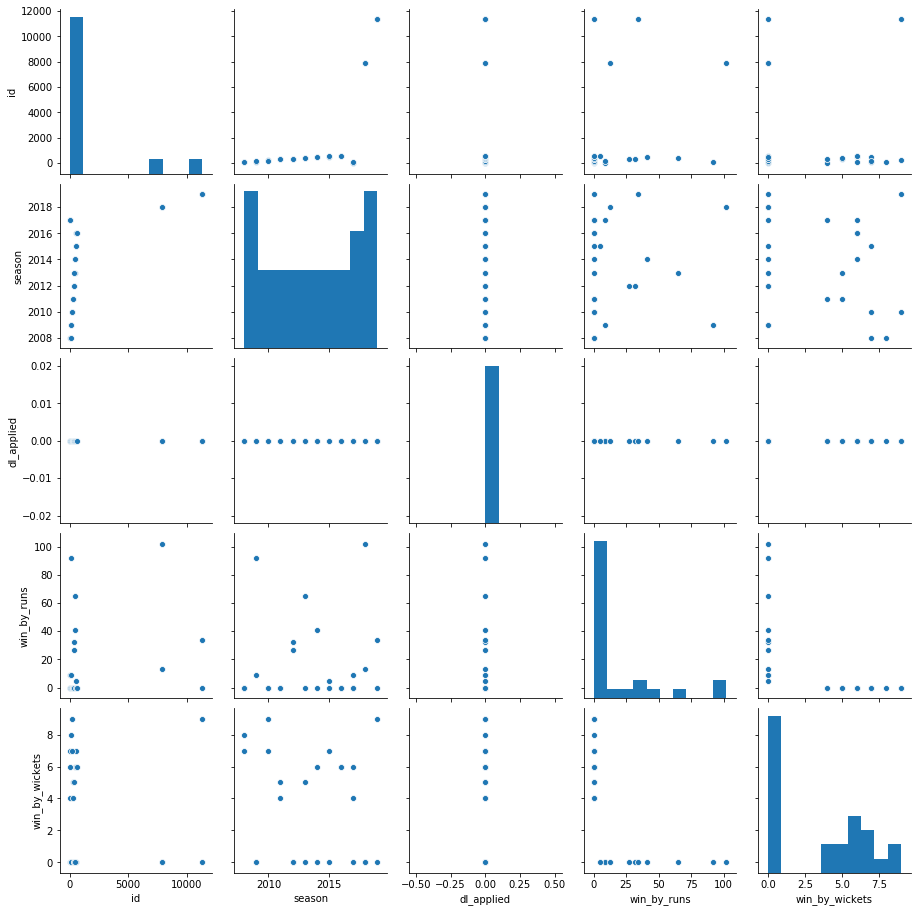

In [27]:
sns.pairplot(MI_KKR)

# Now Time to answer the questions that were asked in the widhya ipl

In [28]:
MI_KKR['toss_winner'].value_counts()

Mumbai Indians           15
Kolkata Knight Riders    10
Name: toss_winner, dtype: int64

# Sometimes Toss plays an crucial role in deciding the winner.MI won the Toss 15 times and KKR won it 10 times

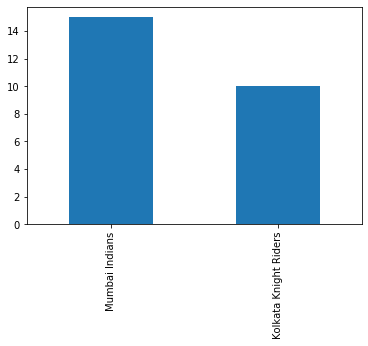

In [29]:
MI_KKR['toss_winner'].value_counts().plot(kind='bar')

In [30]:
print("No of times toss won by both teams:")
MI_KKR['toss_winner'].value_counts()

No of times toss won by both teams:


Mumbai Indians           15
Kolkata Knight Riders    10
Name: toss_winner, dtype: int64

# From 25 matches Mumbai Indians win 7 Times by Batting first and 12 times by Batting second whereas Kolkata knight Riders win 2 times by batting first and 4 times by batting second.

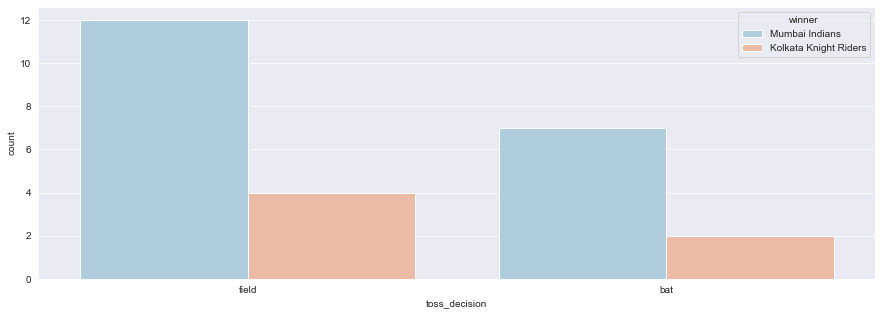

In [32]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_decision',hue='winner',data=MI_KKR,palette='RdBu_r')

In [33]:
MI_KKR['winner'].value_counts()

Mumbai Indians           19
Kolkata Knight Riders     6
Name: winner, dtype: int64

# From 25 matches MI win 19 times and KKR win 6 times.so it clearly shows that MI dominanted KKR most of the times.MI has an edge over KKR.

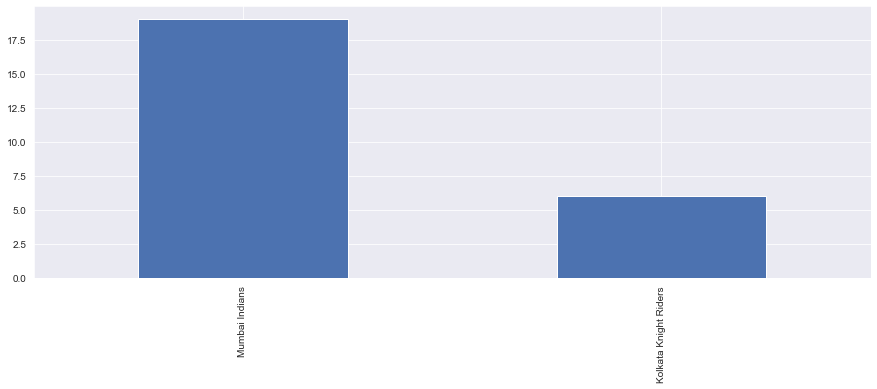

In [34]:
MI_KKR['winner'].value_counts().plot(kind='bar')

# Complete details MI_KKR using sweetviz library

In [34]:
import sweetviz 
my_report=sweetviz.analyze([MI_KKR,'MI_KKR'])

:FEATURES DONE:                    |                     | [  0%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [35]:
my_report.show_html()

# Now it's time to move into deliveries data sets

In [35]:
Deliveries=pd.read_csv("deliveries.csv")

In [36]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [37]:
Deliveries.tail(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [38]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Filtering the match details that only takes place between Kolkata Knight Riders and Mumbai Indians

In [39]:
Mumbai_Kolkata1=Deliveries.loc[(Deliveries['batting_team' ] =='Kolkata Knight Riders' ) & (Deliveries['bowling_team'] == 'Mumbai Indians')]

In [40]:
Mumbai_Kolkata1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1424,7,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1425,7,1,Kolkata Knight Riders,Mumbai Indians,1,2,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1426,7,1,Kolkata Knight Riders,Mumbai Indians,1,3,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1427,7,1,Kolkata Knight Riders,Mumbai Indians,1,4,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1428,7,1,Kolkata Knight Riders,Mumbai Indians,1,5,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177997,11347,1,Kolkata Knight Riders,Mumbai Indians,20,2,RV Uthappa,R Singh,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177998,11347,1,Kolkata Knight Riders,Mumbai Indians,20,3,RV Uthappa,R Singh,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177999,11347,1,Kolkata Knight Riders,Mumbai Indians,20,4,R Singh,RV Uthappa,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178000,11347,1,Kolkata Knight Riders,Mumbai Indians,20,5,RV Uthappa,R Singh,JJ Bumrah,0,...,0,0,0,0,0,0,0,RV Uthappa,caught,RG Sharma


In [41]:
Mumbai_Kolkata2=Deliveries.loc[(Deliveries['bowling_team' ] =='Kolkata Knight Riders' ) & (Deliveries['batting_team'] == 'Mumbai Indians')]

In [42]:
Mumbai_Kolkata2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1552,7,2,Mumbai Indians,Kolkata Knight Riders,1,1,PA Patel,JC Buttler,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1553,7,2,Mumbai Indians,Kolkata Knight Riders,1,2,PA Patel,JC Buttler,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1554,7,2,Mumbai Indians,Kolkata Knight Riders,1,3,PA Patel,JC Buttler,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1555,7,2,Mumbai Indians,Kolkata Knight Riders,1,4,PA Patel,JC Buttler,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1556,7,2,Mumbai Indians,Kolkata Knight Riders,1,5,PA Patel,JC Buttler,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178097,11347,2,Mumbai Indians,Kolkata Knight Riders,16,3,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178098,11347,2,Mumbai Indians,Kolkata Knight Riders,16,4,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
178099,11347,2,Mumbai Indians,Kolkata Knight Riders,16,5,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178100,11347,2,Mumbai Indians,Kolkata Knight Riders,16,6,AS Yadav,RG Sharma,P Krishna,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [43]:
Mumbai_Kolkata=Mumbai_Kolkata1.append(Mumbai_Kolkata2)

In [44]:
Mumbai_Kolkata

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1424,7,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1425,7,1,Kolkata Knight Riders,Mumbai Indians,1,2,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1426,7,1,Kolkata Knight Riders,Mumbai Indians,1,3,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1427,7,1,Kolkata Knight Riders,Mumbai Indians,1,4,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1428,7,1,Kolkata Knight Riders,Mumbai Indians,1,5,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178097,11347,2,Mumbai Indians,Kolkata Knight Riders,16,3,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178098,11347,2,Mumbai Indians,Kolkata Knight Riders,16,4,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
178099,11347,2,Mumbai Indians,Kolkata Knight Riders,16,5,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178100,11347,2,Mumbai Indians,Kolkata Knight Riders,16,6,AS Yadav,RG Sharma,P Krishna,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [45]:
Mumbai_Kolkata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5903 entries, 1424 to 178101
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          5903 non-null   int64 
 1   inning            5903 non-null   int64 
 2   batting_team      5903 non-null   object
 3   bowling_team      5903 non-null   object
 4   over              5903 non-null   int64 
 5   ball              5903 non-null   int64 
 6   batsman           5903 non-null   object
 7   non_striker       5903 non-null   object
 8   bowler            5903 non-null   object
 9   is_super_over     5903 non-null   int64 
 10  wide_runs         5903 non-null   int64 
 11  bye_runs          5903 non-null   int64 
 12  legbye_runs       5903 non-null   int64 
 13  noball_runs       5903 non-null   int64 
 14  penalty_runs      5903 non-null   int64 
 15  batsman_runs      5903 non-null   int64 
 16  extra_runs        5903 non-null   int64 
 17  total_run

In [46]:
Mumbai_Kolkata.describe

<bound method NDFrame.describe of         match_id  inning           batting_team           bowling_team  over  \
1424           7       1  Kolkata Knight Riders         Mumbai Indians     1   
1425           7       1  Kolkata Knight Riders         Mumbai Indians     1   
1426           7       1  Kolkata Knight Riders         Mumbai Indians     1   
1427           7       1  Kolkata Knight Riders         Mumbai Indians     1   
1428           7       1  Kolkata Knight Riders         Mumbai Indians     1   
...          ...     ...                    ...                    ...   ...   
178097     11347       2         Mumbai Indians  Kolkata Knight Riders    16   
178098     11347       2         Mumbai Indians  Kolkata Knight Riders    16   
178099     11347       2         Mumbai Indians  Kolkata Knight Riders    16   
178100     11347       2         Mumbai Indians  Kolkata Knight Riders    16   
178101     11347       2         Mumbai Indians  Kolkata Knight Riders    17   

     

In [47]:
Mumbai_Kolkata.isnull().sum()

match_id               0
inning                 0
batting_team           0
bowling_team           0
over                   0
ball                   0
batsman                0
non_striker            0
bowler                 0
is_super_over          0
wide_runs              0
bye_runs               0
legbye_runs            0
noball_runs            0
penalty_runs           0
batsman_runs           0
extra_runs             0
total_runs             0
player_dismissed    5625
dismissal_kind      5625
fielder             5703
dtype: int64

In [48]:
Mumbai_Kolkata.fillna(0,inplace=True)

In [49]:
Mumbai_Kolkata

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1424,7,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
1425,7,1,Kolkata Knight Riders,Mumbai Indians,1,2,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,0,1,1,0,0,0
1426,7,1,Kolkata Knight Riders,Mumbai Indians,1,3,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
1427,7,1,Kolkata Knight Riders,Mumbai Indians,1,4,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,0,0,0,0,0,0
1428,7,1,Kolkata Knight Riders,Mumbai Indians,1,5,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178097,11347,2,Mumbai Indians,Kolkata Knight Riders,16,3,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,0,0,0,0,0,0
178098,11347,2,Mumbai Indians,Kolkata Knight Riders,16,4,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,4,0,4,0,0,0
178099,11347,2,Mumbai Indians,Kolkata Knight Riders,16,5,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,1,0,1,0,0,0
178100,11347,2,Mumbai Indians,Kolkata Knight Riders,16,6,AS Yadav,RG Sharma,P Krishna,0,...,0,0,0,0,1,0,1,0,0,0


# Let's try covariance to find relation among features

In [50]:
Mumbai_Kolkata.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.227737e+07,-9.613258,282.529231,-1.633831,0.0,-16.617214,6.988306,-14.081239,-0.001326,0.0,315.490767,-23.711472,291.779295
inning,-9.613258e+00,0.249515,-0.150317,-0.014446,0.0,-0.001879,-0.000214,0.000740,0.000101,0.0,-0.004017,-0.001252,-0.005269
over,2.825292e+02,-0.150317,32.155614,-0.124294,0.0,-0.008873,-0.003066,-0.012705,0.005028,0.0,0.906279,-0.019617,0.886662
ball,-1.633831e+00,-0.014446,-0.124294,3.285932,0.0,0.009277,0.005629,0.002499,-0.001706,0.0,0.015433,0.015699,0.031132
is_super_over,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
wide_runs,-1.661721e+01,-0.001879,-0.008873,0.009277,0.0,0.055277,-0.000197,-0.000768,-0.000160,0.0,-0.040700,0.054152,0.013453
bye_runs,6.988306e+00,-0.000214,-0.003066,0.005629,0.0,-0.000197,0.013864,-0.000115,-0.000024,0.0,-0.000933,0.013529,0.012596
legbye_runs,-1.408124e+01,0.000740,-0.012705,0.002499,0.0,-0.000768,-0.000115,0.045468,-0.000093,0.0,-0.022082,0.044492,0.022410
noball_runs,-1.325966e-03,0.000101,0.005028,-0.001706,0.0,-0.000160,-0.000024,-0.000093,0.008113,0.0,-0.000356,0.007837,0.007481
penalty_runs,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


# it's diffult to interpret covariance.Let's try correlation.Correlation clearly mentions using discrete values 1=positively correlated,-1=Negatively correlated,0=No correlation.

In [51]:
Mumbai_Kolkata.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,-0.005492,0.014219,-0.000257,NaN,-0.020171,0.016938,-0.018847,-0.000004,NaN,0.055694,-0.019534,0.051588
inning,-0.005492,1.000000,-0.053068,-0.015954,NaN,-0.015997,-0.003645,0.006950,0.002247,NaN,-0.004974,-0.007233,-0.006534
over,0.014219,-0.053068,1.000000,-0.012092,NaN,-0.006656,-0.004591,-0.010508,0.009844,NaN,0.098857,-0.009986,0.096868
ball,-0.000257,-0.015954,-0.012092,1.000000,NaN,0.021766,0.026374,0.006466,-0.010447,NaN,0.005266,0.025000,0.010640
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,-0.020171,-0.015997,-0.006656,0.021766,NaN,1.000000,-0.007100,-0.015315,-0.007541,NaN,-0.107076,0.664873,0.035448
bye_runs,0.016938,-0.003645,-0.004591,0.026374,NaN,-0.007100,1.000000,-0.004573,-0.002252,NaN,-0.004903,0.331671,0.066271
legbye_runs,-0.018847,0.006950,-0.010508,0.006466,NaN,-0.015315,-0.004573,1.000000,-0.004857,NaN,-0.064056,0.602312,0.065109
noball_runs,-0.000004,0.002247,0.009844,-0.010447,NaN,-0.007541,-0.002252,-0.004857,1.000000,NaN,-0.002444,0.251139,0.051450
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Ball by Ball Details of MI VS KKR From 25 matches 

In [53]:
Mumbai_Kolkata

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1424,7,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
1425,7,1,Kolkata Knight Riders,Mumbai Indians,1,2,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,0,1,1,0,0,0
1426,7,1,Kolkata Knight Riders,Mumbai Indians,1,3,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
1427,7,1,Kolkata Knight Riders,Mumbai Indians,1,4,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,0,0,0,0,0,0
1428,7,1,Kolkata Knight Riders,Mumbai Indians,1,5,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178097,11347,2,Mumbai Indians,Kolkata Knight Riders,16,3,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,0,0,0,0,0,0
178098,11347,2,Mumbai Indians,Kolkata Knight Riders,16,4,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,4,0,4,0,0,0
178099,11347,2,Mumbai Indians,Kolkata Knight Riders,16,5,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,1,0,1,0,0,0
178100,11347,2,Mumbai Indians,Kolkata Knight Riders,16,6,AS Yadav,RG Sharma,P Krishna,0,...,0,0,0,0,1,0,1,0,0,0


In [54]:
Mumbai_Kolkata['match_id'].value_counts()

567      256
7        254
138      253
53       250
303      248
11338    247
581      246
7930     246
458      245
370      245
363      245
75       243
191      241
497      241
413      241
305      241
434      236
518      235
7934     234
230      233
600      233
11347    228
132      219
58       207
99       136
Name: match_id, dtype: int64

In [55]:
Mumbai_Kolkata.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

# From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

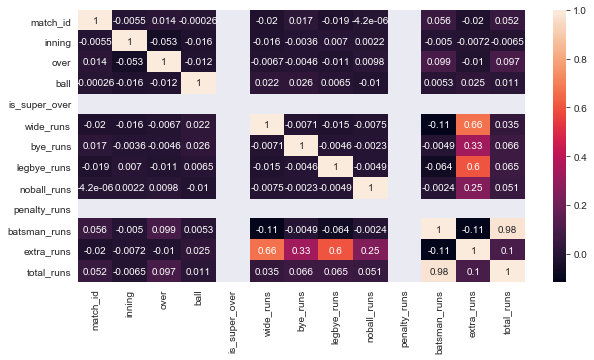

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(Mumbai_Kolkata.corr(),yticklabels=True,annot=True)

# How many Wickets will MI lose in between overs 6-15? 

In [60]:
Mumbai_Kolkata6_15=Mumbai_Kolkata.loc[(Mumbai_Kolkata['over']>=6)&(Mumbai_Kolkata['over']<=15)]

In [61]:
Mumbai_Kolkata6_15

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1458,7,1,Kolkata Knight Riders,Mumbai Indians,6,1,MK Pandey,CA Lynn,MJ McClenaghan,0,...,0,1,0,0,0,1,1,0,0,0
1459,7,1,Kolkata Knight Riders,Mumbai Indians,6,2,CA Lynn,MK Pandey,MJ McClenaghan,0,...,0,0,0,0,4,0,4,0,0,0
1460,7,1,Kolkata Knight Riders,Mumbai Indians,6,3,CA Lynn,MK Pandey,MJ McClenaghan,0,...,0,0,0,0,1,0,1,0,0,0
1461,7,1,Kolkata Knight Riders,Mumbai Indians,6,4,MK Pandey,CA Lynn,MJ McClenaghan,0,...,0,0,0,0,0,0,0,0,0,0
1462,7,1,Kolkata Knight Riders,Mumbai Indians,6,5,MK Pandey,CA Lynn,MJ McClenaghan,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178090,11347,2,Mumbai Indians,Kolkata Knight Riders,15,2,AS Yadav,RG Sharma,H Gurney,0,...,0,0,0,0,4,0,4,0,0,0
178091,11347,2,Mumbai Indians,Kolkata Knight Riders,15,3,AS Yadav,RG Sharma,H Gurney,0,...,0,0,0,0,1,0,1,0,0,0
178092,11347,2,Mumbai Indians,Kolkata Knight Riders,15,4,RG Sharma,AS Yadav,H Gurney,0,...,0,0,0,0,1,0,1,0,0,0
178093,11347,2,Mumbai Indians,Kolkata Knight Riders,15,5,AS Yadav,RG Sharma,H Gurney,0,...,0,0,0,0,4,0,4,0,0,0


# Mumbai indians lost around a total of 14 wickets between overs(6-15) from 25 matches against KKR

In [62]:
Mumbai_Kolkata6_15['dismissal_kind'].value_counts()

0                    2890
caught                 79
bowled                 18
lbw                    13
run out                 7
caught and bowled       4
stumped                 1
Name: dismissal_kind, dtype: int64

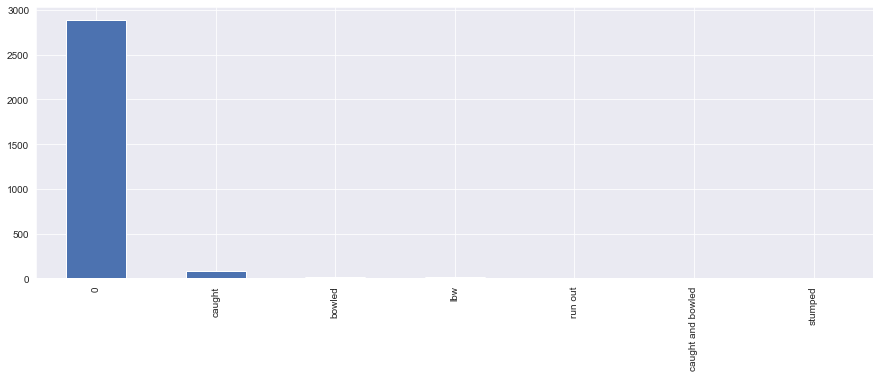

In [63]:
Mumbai_Kolkata6_15['dismissal_kind'].value_counts().plot(kind='bar')

In [65]:
print("Mumbai indians lost around a total of 122 wickets between overs(6-15) from 25 matches against KKR")

Mumbai indians lost around a total of 122 wickets between overs(6-15) from 25 matches against KKR


In [66]:
print("Average amount of wickets lost by Mumbai Indians between (6-15)overs in a single match",122/25)

Average amount of wickets lost by Mumbai Indians between (6-15)overs in a single match 4.88


In [68]:
print("Mumbai lost around 4-5 wicket between overs (6-15)")

Mumbai lost around 4-5 wicket between overs (6-15)


# How many 4's will be hit by KKR?

In [69]:
Mumbai_Kolkata1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1424,7,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1425,7,1,Kolkata Knight Riders,Mumbai Indians,1,2,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1426,7,1,Kolkata Knight Riders,Mumbai Indians,1,3,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1427,7,1,Kolkata Knight Riders,Mumbai Indians,1,4,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1428,7,1,Kolkata Knight Riders,Mumbai Indians,1,5,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177997,11347,1,Kolkata Knight Riders,Mumbai Indians,20,2,RV Uthappa,R Singh,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177998,11347,1,Kolkata Knight Riders,Mumbai Indians,20,3,RV Uthappa,R Singh,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177999,11347,1,Kolkata Knight Riders,Mumbai Indians,20,4,R Singh,RV Uthappa,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178000,11347,1,Kolkata Knight Riders,Mumbai Indians,20,5,RV Uthappa,R Singh,JJ Bumrah,0,...,0,0,0,0,0,0,0,RV Uthappa,caught,RG Sharma


In [70]:
KKR_FOURS=Mumbai_Kolkata1.loc[(Mumbai_Kolkata1['batsman_runs']==4)]

# KKR batsman Scored a total of 329 fours from 25 matches

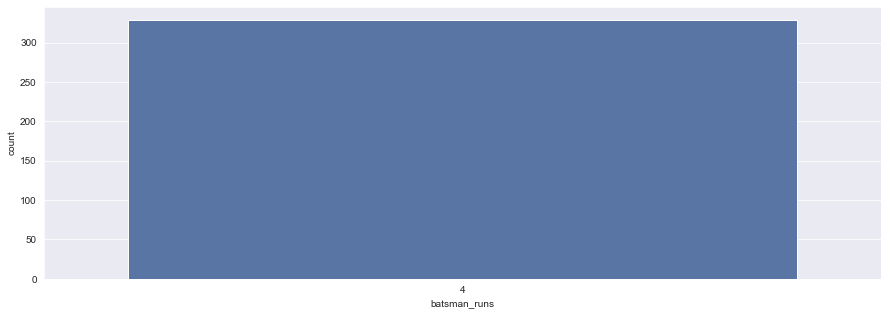

In [71]:
sns.countplot(x='batsman_runs',data=KKR_FOURS)

In [72]:
KKR_FOURS['batsman_runs'].count()

329

In [73]:
print("Average number of fours scored by KKR in a single match against MI:",329/25)

Average number of fours scored by KKR in a single match against MI: 13.16


In [74]:
print("KKR scored around an average of 14 fours against MI in a single match")

KKR scored around an average of 14 fours against MI in a single match


# Those 329 foures were scored against the following Bowlers mentioned in the below plot

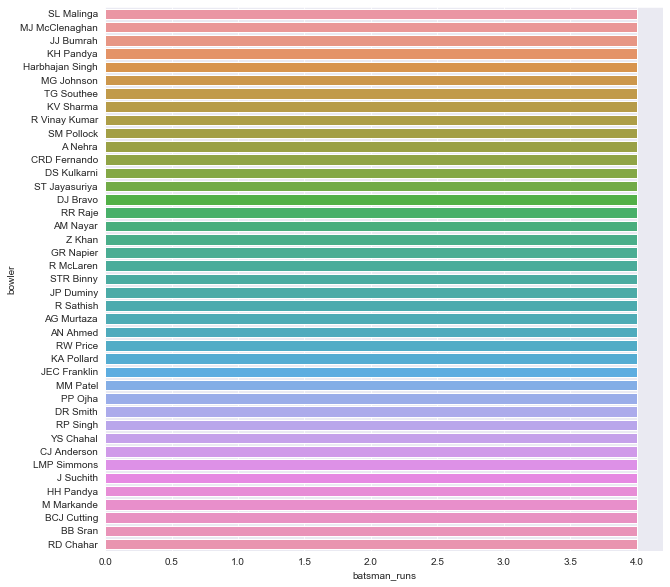

In [75]:
plt.figure(figsize=(10,10))
sns.barplot(y='bowler',x='batsman_runs',data=KKR_FOURS)

# No of Fours given by each Bowlers of MI against KKR over the 25 IPL matches.It looks like Malinga and Krunal Pandya Tops the list.

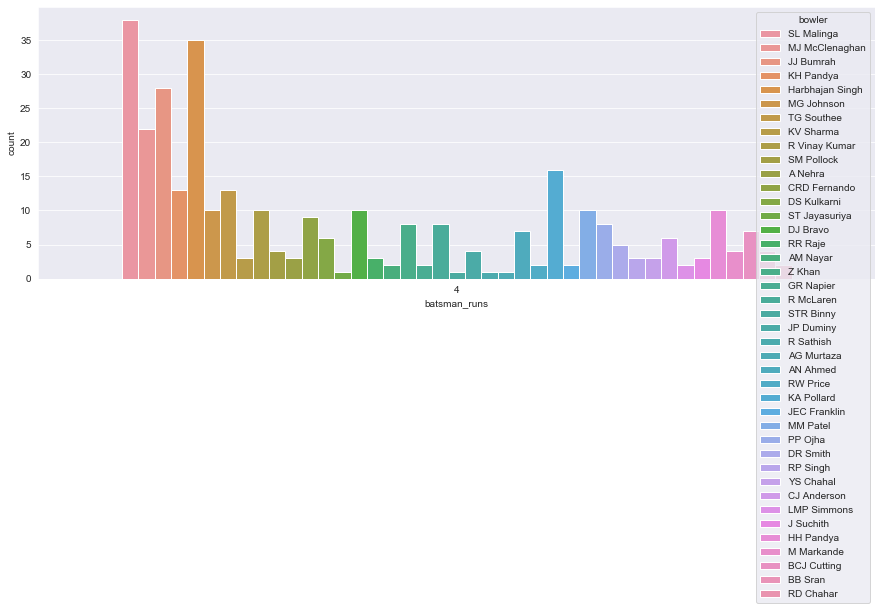

In [76]:
sns.countplot(hue='bowler',x='batsman_runs',data=KKR_FOURS)

# How many runs ll be scored in the match?

In [77]:
Mumbai_Kolkata

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1424,7,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
1425,7,1,Kolkata Knight Riders,Mumbai Indians,1,2,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,0,1,1,0,0,0
1426,7,1,Kolkata Knight Riders,Mumbai Indians,1,3,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
1427,7,1,Kolkata Knight Riders,Mumbai Indians,1,4,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,0,0,0,0,0,0
1428,7,1,Kolkata Knight Riders,Mumbai Indians,1,5,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178097,11347,2,Mumbai Indians,Kolkata Knight Riders,16,3,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,0,0,0,0,0,0
178098,11347,2,Mumbai Indians,Kolkata Knight Riders,16,4,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,4,0,4,0,0,0
178099,11347,2,Mumbai Indians,Kolkata Knight Riders,16,5,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,1,0,1,0,0,0
178100,11347,2,Mumbai Indians,Kolkata Knight Riders,16,6,AS Yadav,RG Sharma,P Krishna,0,...,0,0,0,0,1,0,1,0,0,0


In [78]:
Mumbai_Kolkata.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1424,7,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
1425,7,1,Kolkata Knight Riders,Mumbai Indians,1,2,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,0,1,1,0,0,0


In [79]:
Total_runs=Mumbai_Kolkata['total_runs'].value_counts()
Total_runs

1    2365
0    2149
4     707
2     384
6     265
3      21
5       8
8       3
7       1
Name: total_runs, dtype: int64

In [80]:
Total_runs=Mumbai_Kolkata['total_runs'].sum()
Total_runs

7685

[Text(0, 0.5, 'frequency of Runs'),
 Text(0.5, 0, 'Runs scored via 1s,2s,3s,4s,5s,6s,7s(six on No ball)')]

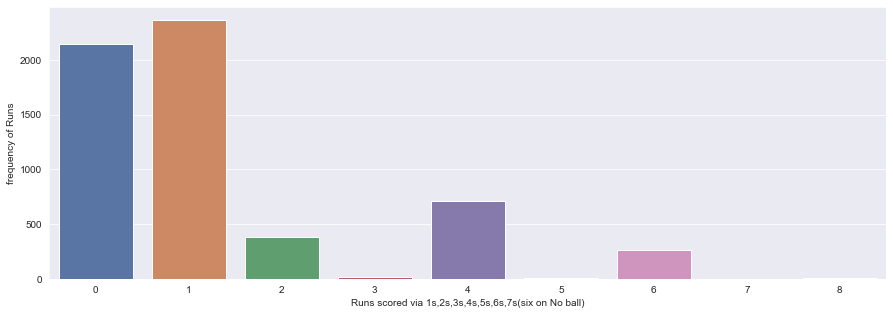

In [81]:
ax=sns.countplot(x='total_runs',data=Mumbai_Kolkata)
#plt.xlabel("Runs scored via 1s,2s,3s,4s,5s,6s,7s(six on No ball)",fontdict='font')
ax.set(xlabel='Runs scored via 1s,2s,3s,4s,5s,6s,7s(six on No ball)', ylabel='frequency of Runs')


In [82]:
Total_matches=Mumbai_Kolkata['match_id'].value_counts()

# it's not possible for a batsman to score 8runs on a single ball.some errors are there

In [83]:
runs_8=Mumbai_Kolkata.loc[(Mumbai_Kolkata['total_runs']==8)]

In [125]:
runs_8

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
159131,7930,2,Kolkata Knight Riders,Mumbai Indians,2,6,CA Lynn,S Gill,JJ Bumrah,0,...,4,0,0,0,4,4,8,0,0,0
159222,7930,2,Kolkata Knight Riders,Mumbai Indians,17,6,KD Karthik,SP Narine,JJ Bumrah,0,...,0,4,0,0,4,4,8,0,0,0
176127,11338,2,Mumbai Indians,Kolkata Knight Riders,16,3,HH Pandya,KH Pandya,PP Chawla,0,...,4,0,0,0,4,4,8,0,0,0


# Bye runs will be added into extra runs.Batsman _runs column should be zero.Here data given is wrong.Need to reduce 12 runs from total runs.so 7685-12=7673)

In [85]:
print("Total Runs scored by both teams from their 25 matches was",Total_runs-12)

Total Runs scored by both teams from their 25 matches was 7673


In [86]:
print("Average Runs scored by Both Teams in a single match was",(Total_runs-12)//25)

Average Runs scored by Both Teams in a single match was 306


# How Rohit sharma ll get out in the match?

In [87]:
Mumbai_Kolkata2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1552,7,2,Mumbai Indians,Kolkata Knight Riders,1,1,PA Patel,JC Buttler,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1553,7,2,Mumbai Indians,Kolkata Knight Riders,1,2,PA Patel,JC Buttler,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1554,7,2,Mumbai Indians,Kolkata Knight Riders,1,3,PA Patel,JC Buttler,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1555,7,2,Mumbai Indians,Kolkata Knight Riders,1,4,PA Patel,JC Buttler,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1556,7,2,Mumbai Indians,Kolkata Knight Riders,1,5,PA Patel,JC Buttler,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [112]:
Rohit_got_out=Mumbai_Kolkata2.loc[(Mumbai_Kolkata2['batsman']=='RG Sharma')]

In [113]:
Rohit_got_out


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1609,7,2,Mumbai Indians,Kolkata Knight Riders,9,4,RG Sharma,N Rana,AS Rajpoot,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1610,7,2,Mumbai Indians,Kolkata Knight Riders,9,5,RG Sharma,N Rana,AS Rajpoot,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1612,7,2,Mumbai Indians,Kolkata Knight Riders,10,1,RG Sharma,N Rana,SP Narine,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1613,7,2,Mumbai Indians,Kolkata Knight Riders,10,2,RG Sharma,N Rana,SP Narine,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1614,7,2,Mumbai Indians,Kolkata Knight Riders,10,3,RG Sharma,N Rana,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178092,11347,2,Mumbai Indians,Kolkata Knight Riders,15,4,RG Sharma,AS Yadav,H Gurney,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178096,11347,2,Mumbai Indians,Kolkata Knight Riders,16,2,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178097,11347,2,Mumbai Indians,Kolkata Knight Riders,16,3,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178098,11347,2,Mumbai Indians,Kolkata Knight Riders,16,4,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [114]:
Rohit_got_out['dismissal_kind'].value_counts()

caught               7
lbw                  3
bowled               2
caught and bowled    1
Name: dismissal_kind, dtype: int64

# Rojit sharma got out on 7 times by caught ,3 times by lbw and 2times by bowled

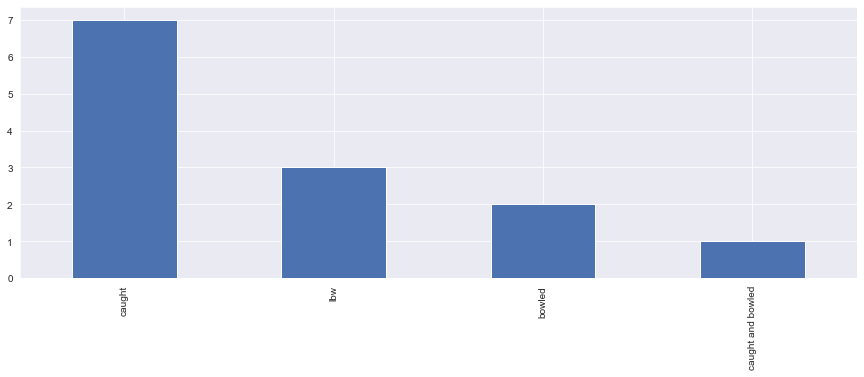

In [115]:
Rohit_got_out['dismissal_kind'].value_counts().plot(kind='bar')

In [116]:
Dismissal_kind=Rohit_got_out['dismissal_kind'].value_counts()

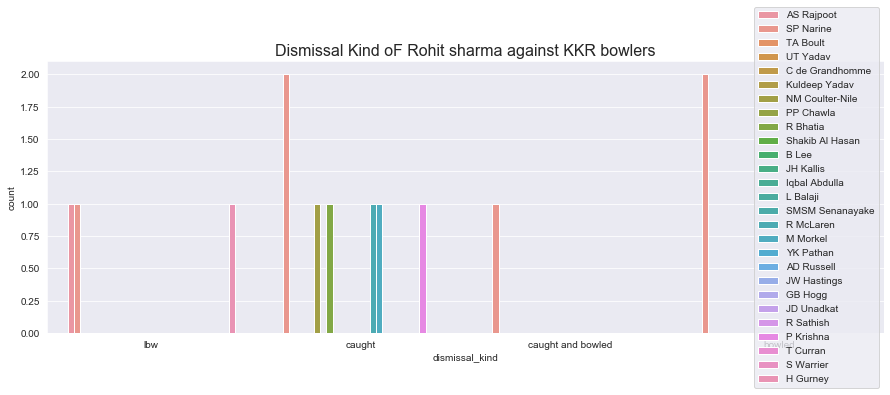

In [117]:
sns.countplot(x='dismissal_kind',hue='bowler',data=Rohit_got_out)
plt.title('Dismissal Kind oF Rohit sharma against KKR bowlers', fontsize = 16)
plt.legend(loc='right')
plt.show()

In [127]:
print("Rohit sharma got dismissed mostly by caught")

Rohit sharma got dismissed mostly by caught


# Rohit sharma vs KKR bowlers

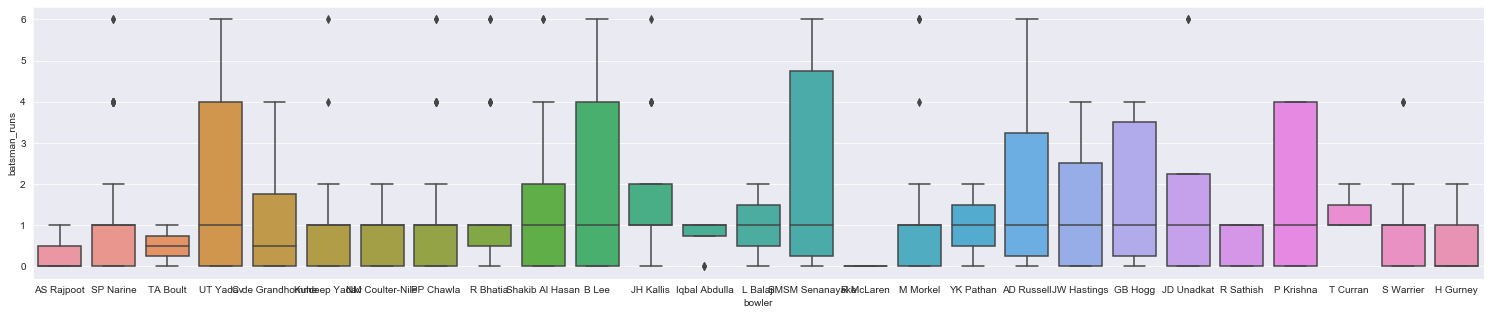

In [118]:
plt.figure(figsize=(26,5))
sns.boxplot(x='bowler',y='batsman_runs',data=Rohit_got_out)

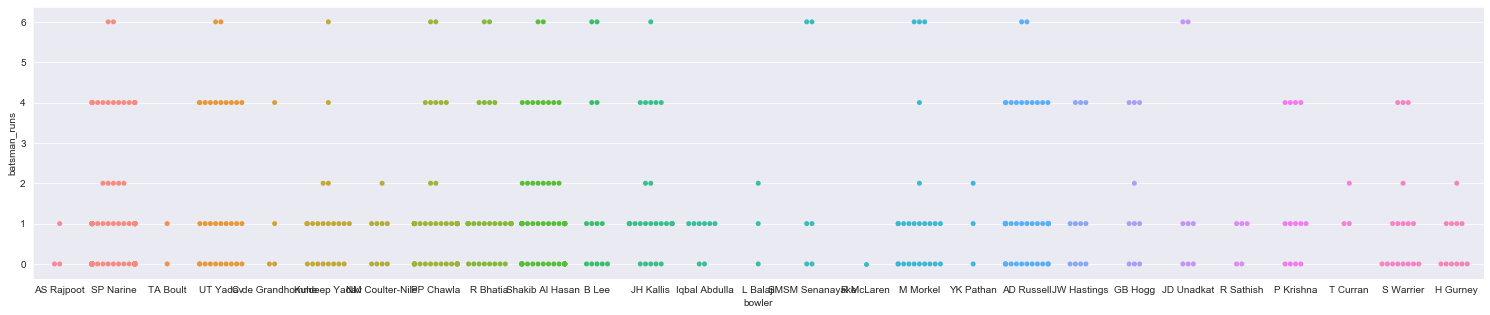

In [119]:
plt.figure(figsize=(26,5))
sns.swarmplot(x='bowler',y='batsman_runs',data=Rohit_got_out)

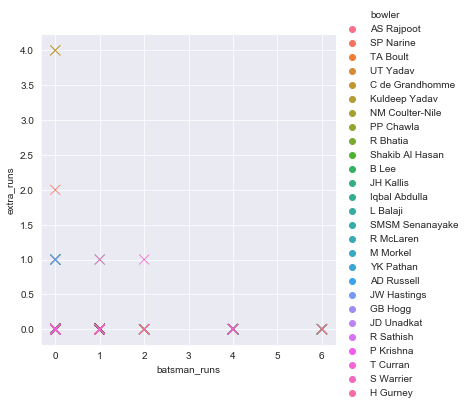

In [124]:
sns.relplot(data=Rohit_got_out,x="batsman_runs",y='extra_runs',hue="bowler", marker="x", s=100)

# Ball By Ball Runs Of Rohit sharma against KKR Bowlers  is in the report  "Rohit_runs_report"

In [129]:
import sweetviz 
Rohit_runs_report=sweetviz.analyze([Rohit_got_out,'Rohit_got_out'])

:FEATURES DONE:                    |                     | [  0%]   00:10  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [130]:
Rohit_runs_report.show_html()

# From my analysing and considering current matches and current form of Team and it's players.I predicted the following,
# 1.MI will win the match
# 2.MI will lose around (4-5)wickets during(6-15)overs
# 3.KKR will hit around 14fours
# 4.Total score was below 320 runs
# 5.Rohit sharma will get out by caught.
# These results are solely based on my analysis.Don't forget this year IPL has been played in UAE.So Data's from the past ll be contrary to the current stats.
